# Exploratory Data Analysis on Netflix Dataset¶

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
from math import sqrt
import plotly as py
import plotly.graph_objects as go
import statsmodels.api as sm
import os
import math
from datetime import datetime
from datetime import timedelta
import plotly.express as px
import ast
import random
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import os
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))
import datetime as dt
plt.rcParams['figure.dpi'] = 140

In [3]:
# Importing Netflix data as 'nf_df' and checking sample of data
nf_df = pd.read_csv('NetFlix_Dataset.csv')
nf_df.sample(10)

,Id,TITLE,Age_Certification,Scores_round,Type,Year_of_ReleaseYear,Release_Year,Imdb_Votes,Runtime,Description,Avg_score_LOD,Imdb_Score
373,ts271595,CRIME SCENE: THE VANISHING AT THE CECIL HOTEL,TV-MA,5.5,SHOW,2021,01-01-2021,16799,55,The notorious Cecil Hotel grows in infamy when...,6.533447,5.9
1167,tm417553,6 UNDERGROUND,R,6.0,MOVIE,2019,01-01-2019,168919,127,"After faking his death, a tech billionaire rec...",6.533447,6.1
1499,ts53545,SANTA CLARITA DIET,TV-MA,7.5,SHOW,2017,01-01-2017,64467,29,They're ordinary husband and wife realtors unt...,6.533447,7.9
1017,tm1077201,STUCK TOGETHER,Unknown,6.0,MOVIE,2021,01-01-2021,6699,126,Seven families live in the Parisian apartment ...,6.533447,6.3
1402,ts56511,CABLE GIRLS,TV-MA,7.5,SHOW,2017,01-01-2017,13855,50,"In 1920s Madrid, four women at the National Te...",6.533447,7.6
1354,tm233843,PYAAR KA PUNCHNAMA 2,PG-13,7.0,MOVIE,2015,01-01-2015,14968,159,"After falling in love, three roommates experie...",6.533447,7.3
341,tm35700,PAAN SINGH TOMAR,PG,8.0,MOVIE,2012,01-01-2012,35888,135,Paan Singh Tomar goes from celebrated runner t...,6.533447,8.2
514,tm943790,SUMMERLAND,PG,7.0,MOVIE,2020,01-01-2020,6052,100,A woman during the Second World War opens her ...,6.533447,7.0
1616,ts237107,SWEET MAGNOLIAS,TV-14,7.0,SHOW,2020,01-01-2020,17435,50,"Lifelong friends Maddie, Helen and Dana Sue li...",6.533447,7.3
1447,ts75097,MANIAC,TV-MA,7.5,SHOW,2018,01-01-2018,74877,39,Two strangers are drawn to a mysterious pharma...,6.533447,7.7


In [4]:
# Let's check the number of entries
nf_df.shape
# this will result the tupal of no. of raws and coulumn

(1850, 12)

In [5]:
#Let's view the list of columns in the data frame.
nf_df.columns


Index(['Id', 'TITLE', 'Age_Certification', 'Scores_round', 'Type',
       'Year_of_ReleaseYear', 'Release_Year', 'Imdb_Votes', 'Runtime',
       'Description', 'Avg_score_LOD', 'Imdb_Score'],
      dtype='object')

## Step 1

# Data Cleaning

1.dealing with duplicate entries, missing values

In [6]:
# Let's check the no. of duplicate entries
nf_df.duplicated().sum() 

0

In [7]:
#Let's check the no. of missing values
nf_df.isnull().sum()

Id                     0
TITLE                  0
Age_Certification      0
Scores_round           0
Type                   0
Year_of_ReleaseYear    0
Release_Year           0
Imdb_Votes             0
Runtime                0
Description            0
Avg_score_LOD          0
Imdb_Score             0
dtype: int64

In [9]:
nf_df.drop_duplicates()

,Id,TITLE,Age_Certification,Scores_round,Type,Year_of_ReleaseYear,Release_Year,Imdb_Votes,Runtime,Description,Avg_score_LOD,Imdb_Score
0,tm931330,BLACKPINK: LIGHT UP THE SKY,PG-13,7.5,MOVIE,2020,01-01-2020,6319,79,Record-shattering Korean girl band BLACKPINK t...,6.533447,7.5
1,tm432022,VIOLET EVERGARDEN: THE MOVIE,PG,8.0,MOVIE,2020,01-01-2020,5631,140,As the world moves on from the war and technol...,6.533447,8.3
2,tm138297,THE CONJURING 2,R,7.0,MOVIE,2016,01-01-2016,260693,134,New Line Cinema's supernatural thriller The Co...,6.533447,7.3
3,tm71148,THANKS FOR SHARING,R,6.0,MOVIE,2013,01-01-2013,28204,112,A romantic comedy that brings together three d...,6.533447,6.4
4,tm149914,JIM JEFFERIES: BARE,R,8.0,MOVIE,2014,01-01-2014,5407,76,"Smart, crude, and in-your-face, Australian com...",6.533447,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1845,tm374132,BIRD BOX,R,6.5,MOVIE,2018,01-01-2018,325194,124,Five years after an ominous unseen presence dr...,6.533447,6.6
1846,tm1138477,DOWNFALL: THE CASE AGAINST BOEING,R,7.0,MOVIE,2022,01-01-2022,9428,89,Investigators reveal how Boeingâ€™s alleged pr...,6.533447,7.4
1847,tm845415,MISS AMERICANA,R,7.0,MOVIE,2020,01-01-2020,19151,85,A raw and emotionally revealing look at one of...,6.533447,7.4
1848,ts20823,ORANGE IS THE NEW BLACK,TV-MA,8.0,SHOW,2013,01-01-2013,295591,59,A crime she committed in her youthful past sen...,6.533447,8.1


In [7]:
nf_df.Age_Certification.value_counts()

Unknown    438
R          415
TV-MA      327
PG-13      268
TV-14      167
PG         134
TV-PG       32
G           23
TV-Y7       19
TV-G        15
NC-17       10
TV-Y         2
Name: Age_Certification, dtype: int64

In [8]:
#Unknown Age Certification, here I'm replacing the Unknown to TV-MA for convience

df2 = nf_df.replace('Unknown','TV-MA', inplace=True)

In [9]:
nf_df.Age_Certification.value_counts()

TV-MA    765
R        415
PG-13    268
TV-14    167
PG       134
TV-PG     32
G         23
TV-Y7     19
TV-G      15
NC-17     10
TV-Y       2
Name: Age_Certification, dtype: int64

# Analyze of Types


In [10]:
types = nf_df.groupby('Type').size().reset_index().rename(columns = {0:'counts'})
types

,Type,counts
0,MOVIE,1280
1,SHOW,570


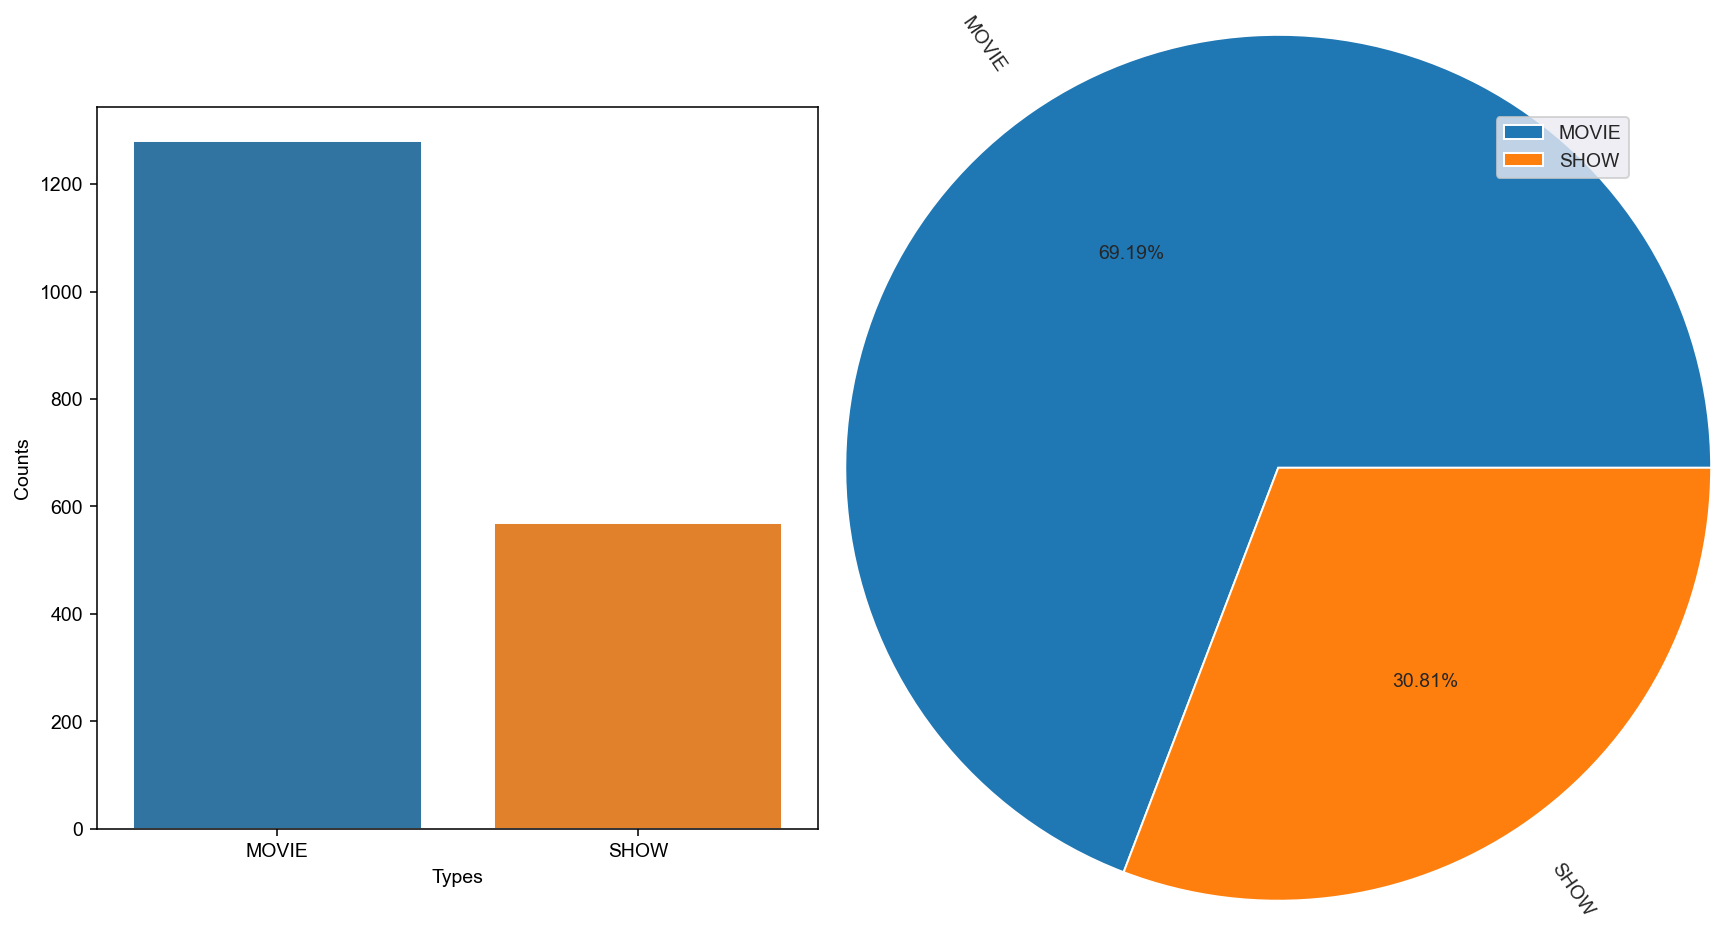

In [11]:
langs= types.Type
fig, axes = plt.subplots(1,2, figsize=(12,6))
plt.tight_layout(pad=2)
sns.set_style("darkgrid")
a1=sns.barplot(x = types.Type,y = types.counts,ax=axes[0]);
a1.set(xlabel='Types', ylabel='Counts')
plt.pie(types.counts,autopct='%1.2f%%',labels = langs,radius=1.5,labeldistance=1.1 ,   rotatelabels=True)
plt.legend()
plt.show()

## Observation
**It has been Observed That Netflix has Movies(69.19) more than Shows(30.81).**

# Analysis of Age Certification

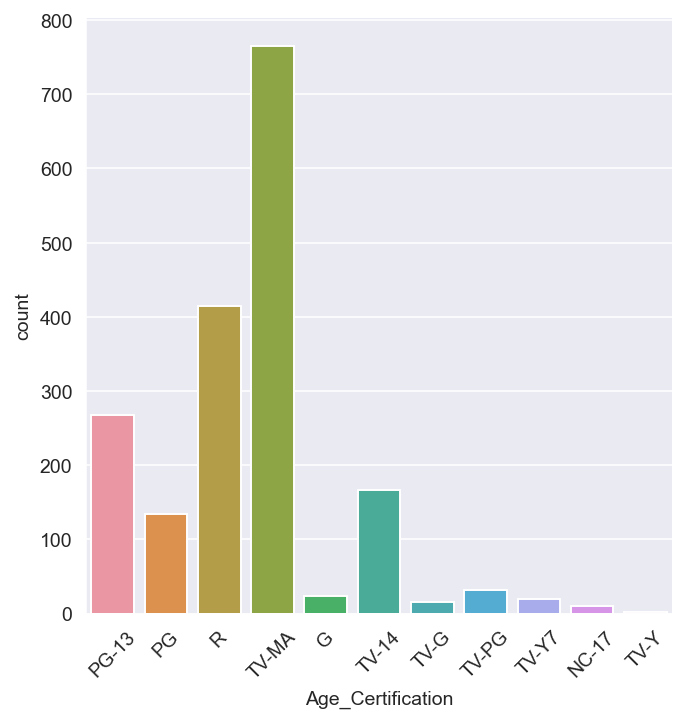

In [12]:
sns.catplot(x='Age_Certification',kind="count",data=nf_df)
plt.xticks(rotation=45)
plt.show()

## Observation
 
**TV_MA: asigned to be viewed by adults and therefore may be unsuitable for children under 17**

In [13]:
Imdb_Score = nf_df.groupby('Imdb_Score').size().reset_index().sort_values(by = 0,ascending = 0).reset_index().drop('index',axis = 1).rename(columns = {0:'counts'})
Imdb_Score


,Imdb_Score,counts
0,7.5,76
1,7.4,74
2,7.1,71
3,7.6,68
4,7.3,68
...,...,...
64,4.2,1
65,3.9,1
66,2.9,1
67,2.3,1


In [26]:
import matplotlib
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

(array([  1.,   3.,  10.,  13.,  20.,  51., 108., 192., 235., 299., 329.,
        294., 212.,  67.,  13.,   1.]),
 array([ 2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,
         7.5,  8. ,  8.5,  9. ,  9.5, 10. ]),
 <BarContainer object of 16 artists>)

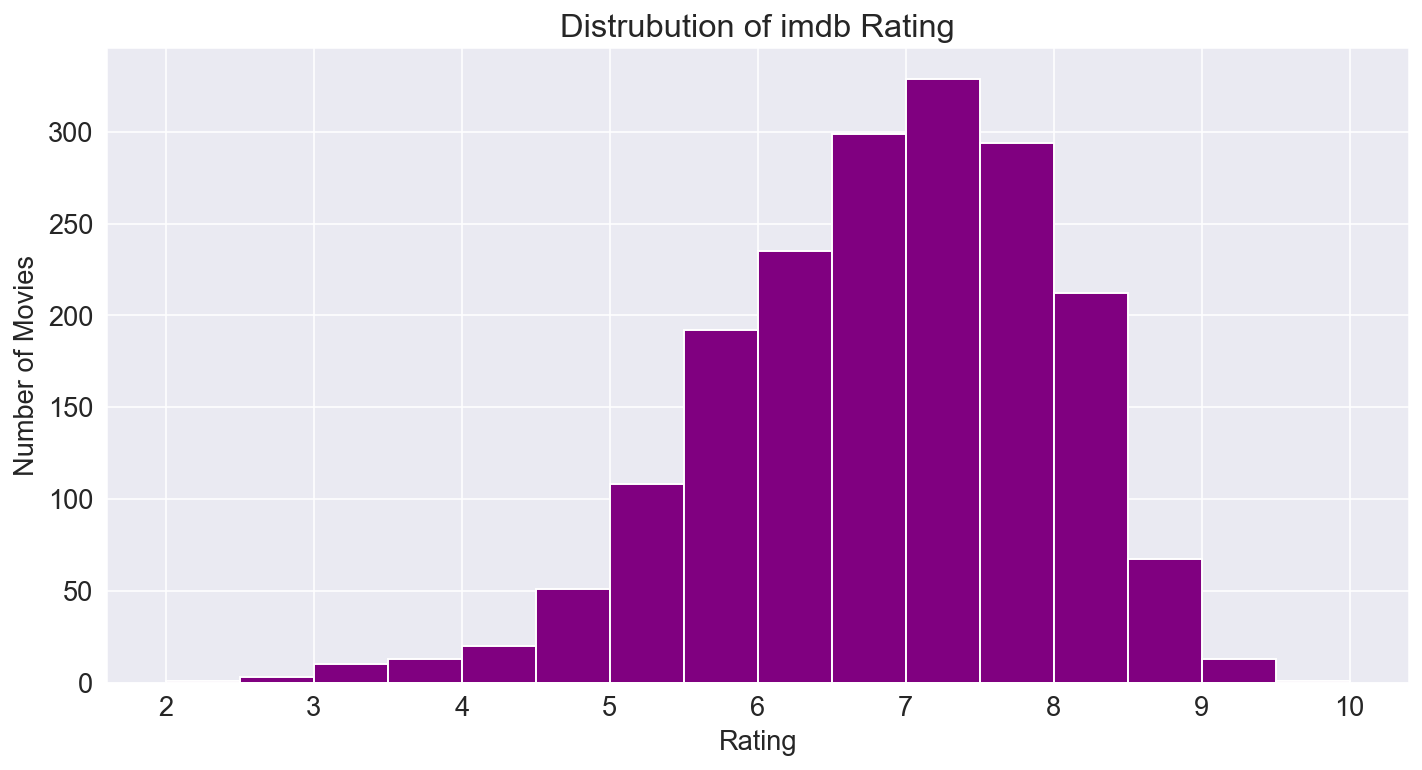

In [27]:
#Let's view the distrubution of Imdb rating
plt.figure(figsize=(12, 6))
plt.title('Distrubution of imdb Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')

plt.hist(nf_df.Imdb_Score, bins=np.arange(2,10.1,.5), color='purple')

# Analyze Of Release Years

In [17]:
year = nf_df.groupby(['Year_of_ReleaseYear']).size().reset_index().rename(columns = {0:"counts",'release_year':'Year'})
year

,Year_of_ReleaseYear,counts
0,1954,1
1,1961,1
2,1964,1
3,1966,1
4,1967,1
5,1969,1
6,1971,1
7,1973,1
8,1975,1
9,1976,1


In [19]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=list(year.Year_of_ReleaseYear), y=list(year.counts)))

# Set title
fig.update_layout(
    title_text="No of Movies & Shows Release Over the Years"
)

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)
fig.show()

In [21]:
release_year_count= nf_df.Year_of_ReleaseYear.value_counts()
release_year_count = pd.DataFrame(release_year_count)
release_year_count

,Year_of_ReleaseYear
2019,217
2020,216
2018,201
2021,189
2017,184
2016,133
2015,101
2013,64
2014,63
2011,51


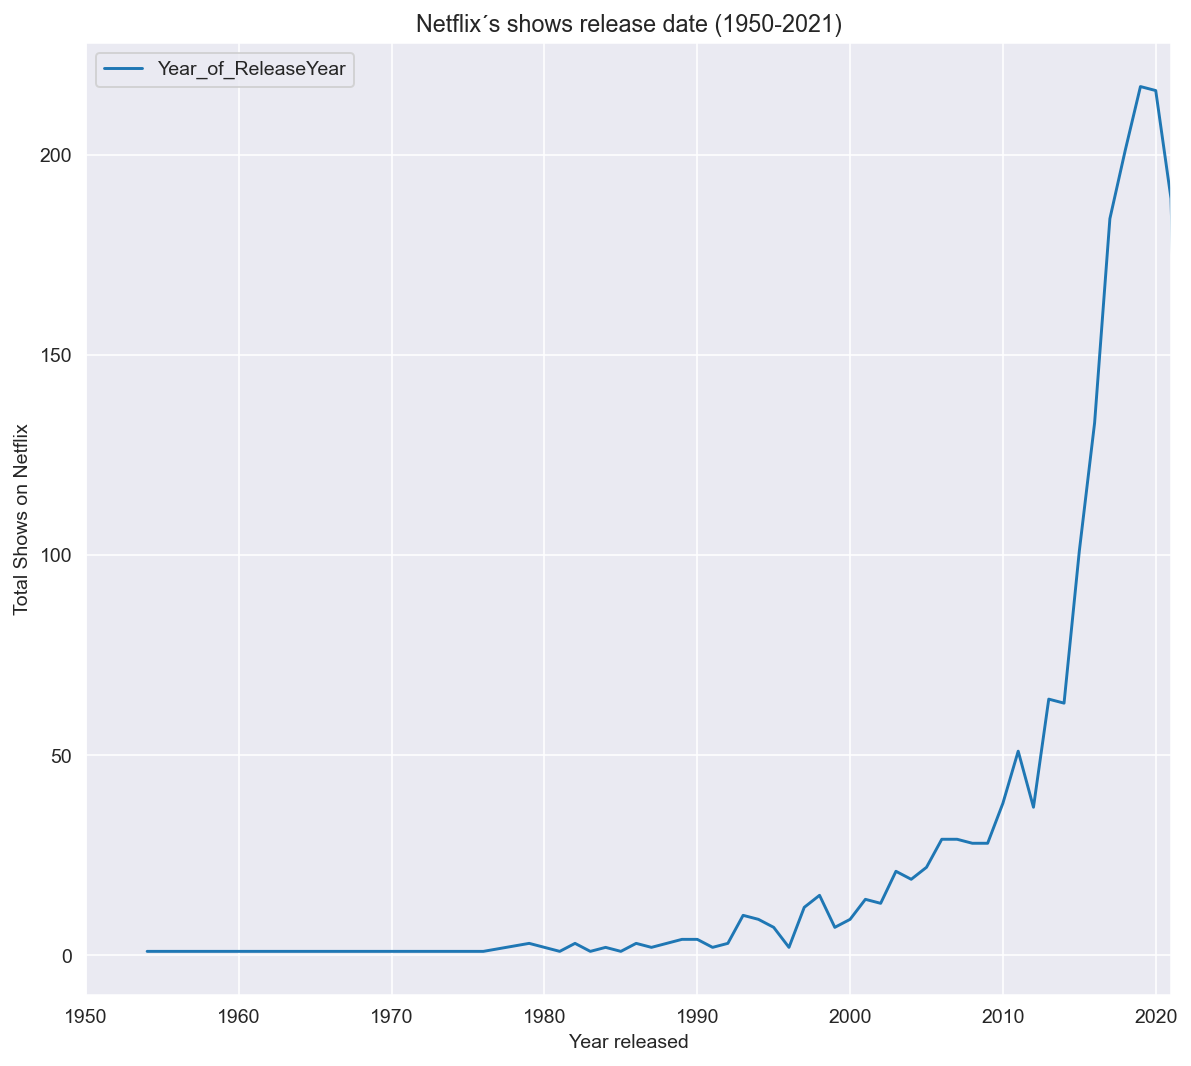

In [23]:
plt.figure(figsize=(10, 9))
sns.lineplot(data= release_year_count)
plt.title('Netflix´s shows release date (1950-2021)')
plt.xlim(1950, 2021)
plt.xlabel('Year released')
plt.ylabel('Total Shows on Netflix')
plt.show()

## Observation
**It has been Observed That most of the Movies are released in 2019.**

**It has been Observed That most of the Movies are released in period of 2010-2019.**

In [29]:
show = nf_df[nf_df.Type == 'SHOW']
movies = nf_df[nf_df.Type == 'MOVIE']

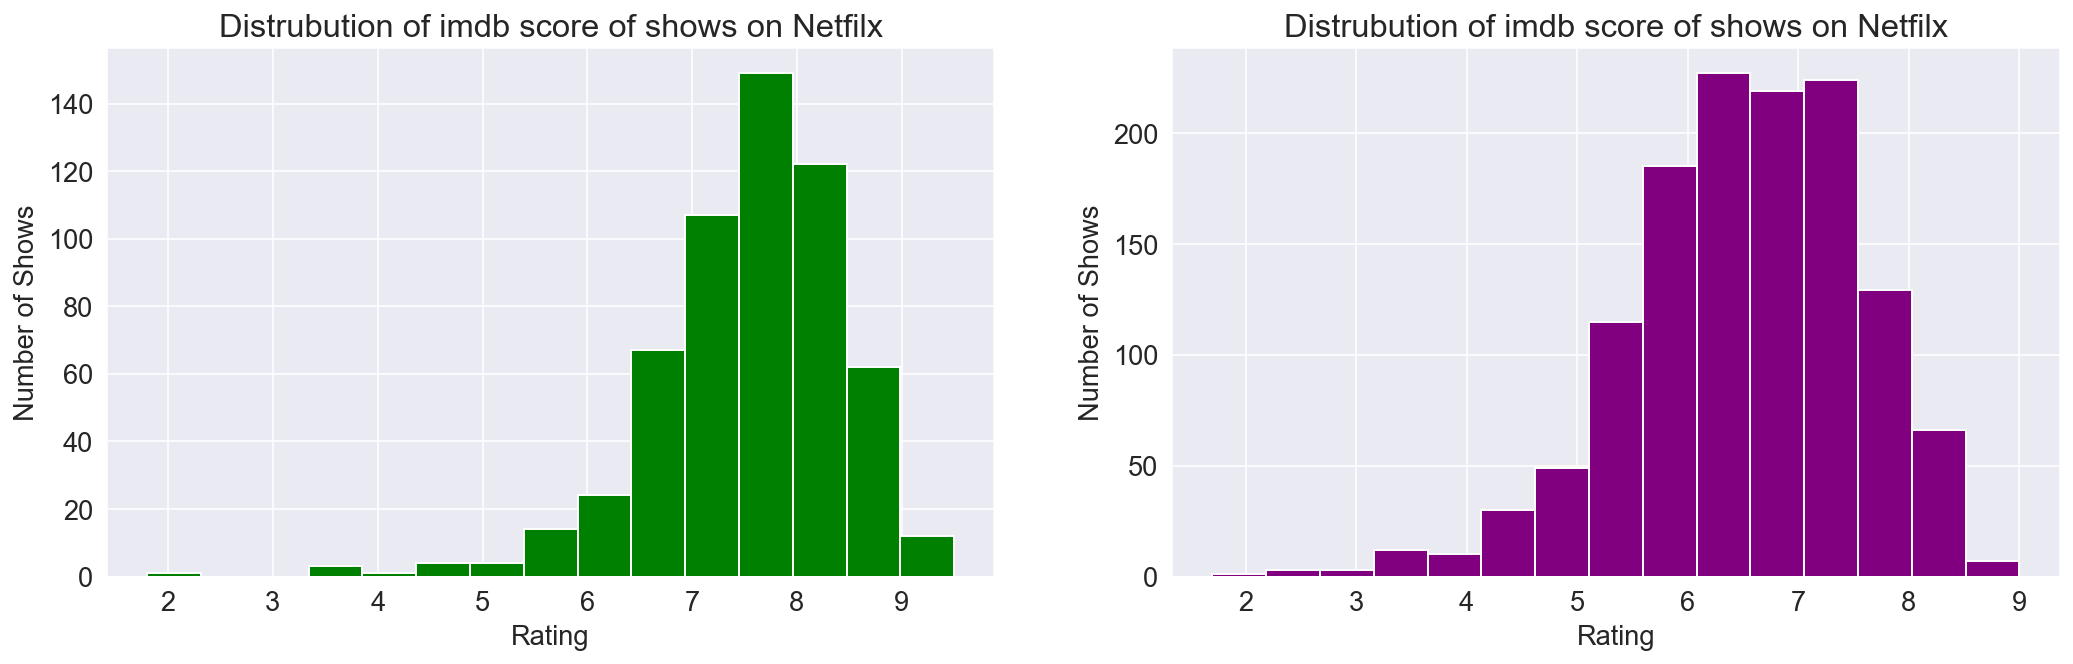

In [31]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax2 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)See tip below**

# Subplot 1: histogram plot of imdb_score of SHOWs of Netflix
show.Imdb_Score.plot(kind='hist', color='green',bins=(15), figsize=(18, 5), ax=ax1) 
ax1.set_title('Distrubution of imdb score of shows on Netfilx')
ax1.set_xlabel('Rating')
ax1.set_ylabel('Number of Shows')

# Subplot 2: histogram plot of imdb_score of MOVIEs of Netflix
movies.Imdb_Score.plot(kind='hist', color='purple',bins=(15), figsize=(18, 5), ax=ax2)
ax2.set_title('Distrubution of imdb score of shows on Netfilx')
ax2.set_xlabel('Rating')
ax2.set_ylabel('Number of Shows')
plt.show()

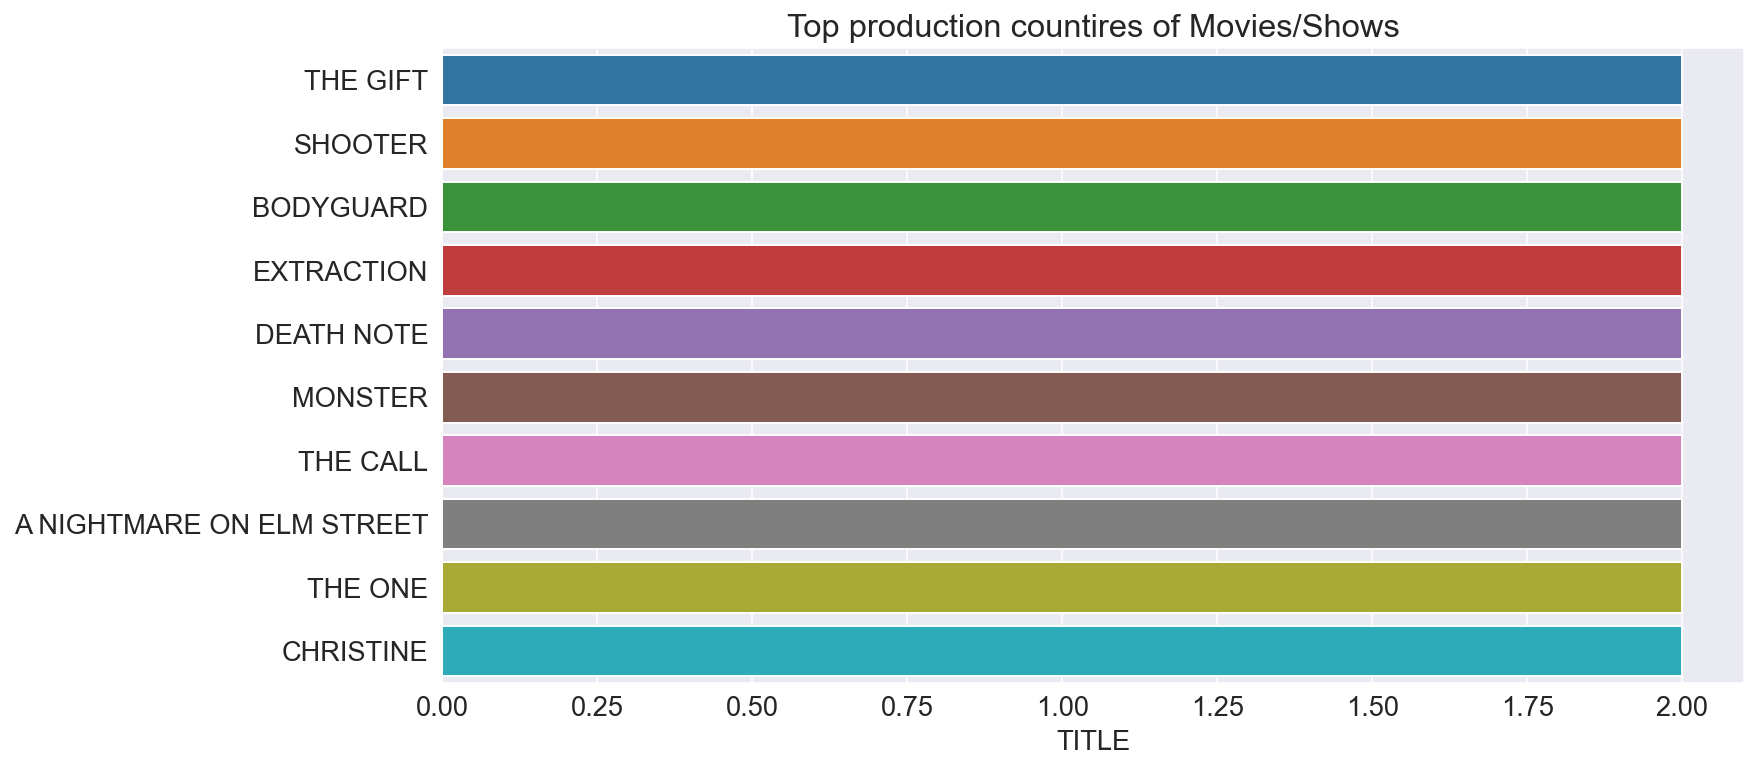

In [33]:
#Let's see the top 10 production countires.
Top_production_countires =nf_df.TITLE.value_counts().sort_values(ascending= False).head(10)
plt.figure(figsize=(12,6))
plt.title('Top production countires of Movies/Shows')
xlable = ('Number of movies')
sns.barplot(x= Top_production_countires, y=Top_production_countires.index);

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

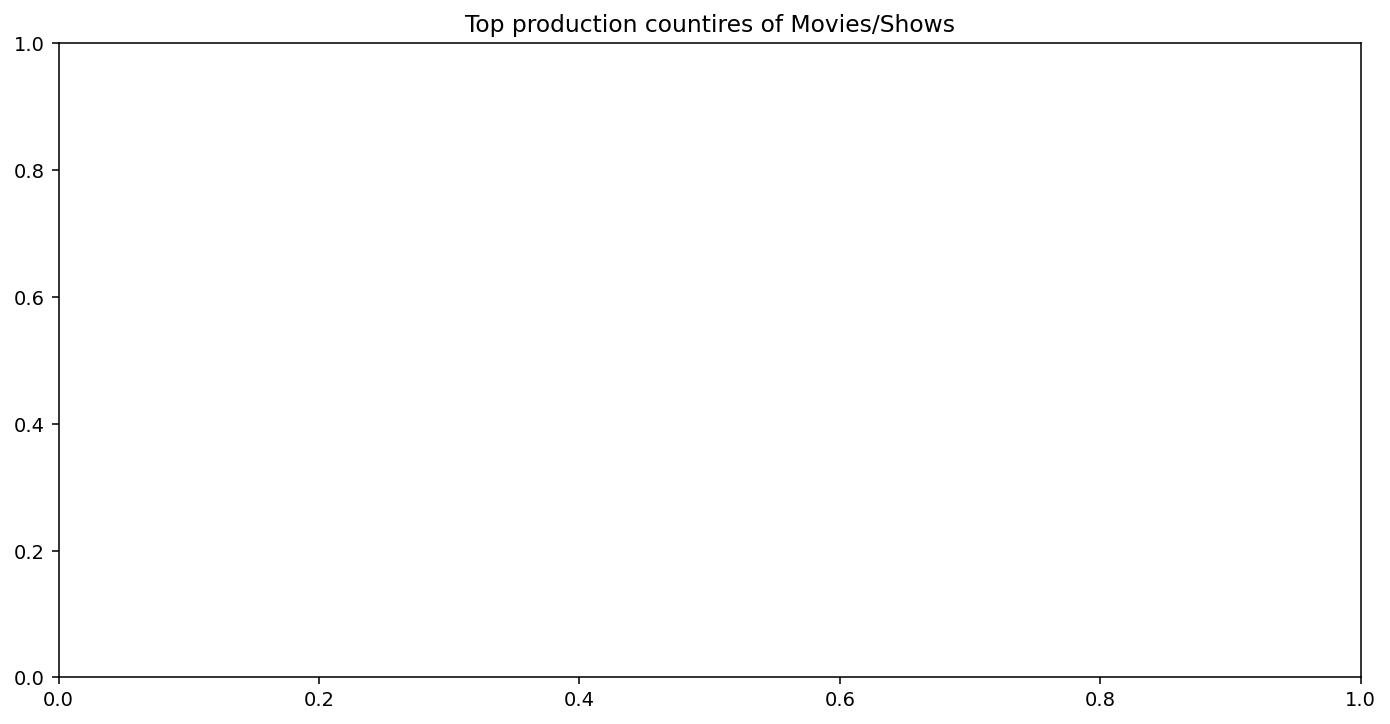

In [30]:
Top_production_countires = nf_df.sort_values(by=['Imdb_Score'], inplace=False, ascending=False).head(10)
plt.figure(figsize=(12,6))
plt.title('Top production countires of Movies/Shows')
xlable = ('Number of movies')
sns.barplot(x= Top_production_countires, y= "TITLE" , data=nf_df)

<AxesSubplot:xlabel='Imdb_Score', ylabel='TITLE'>

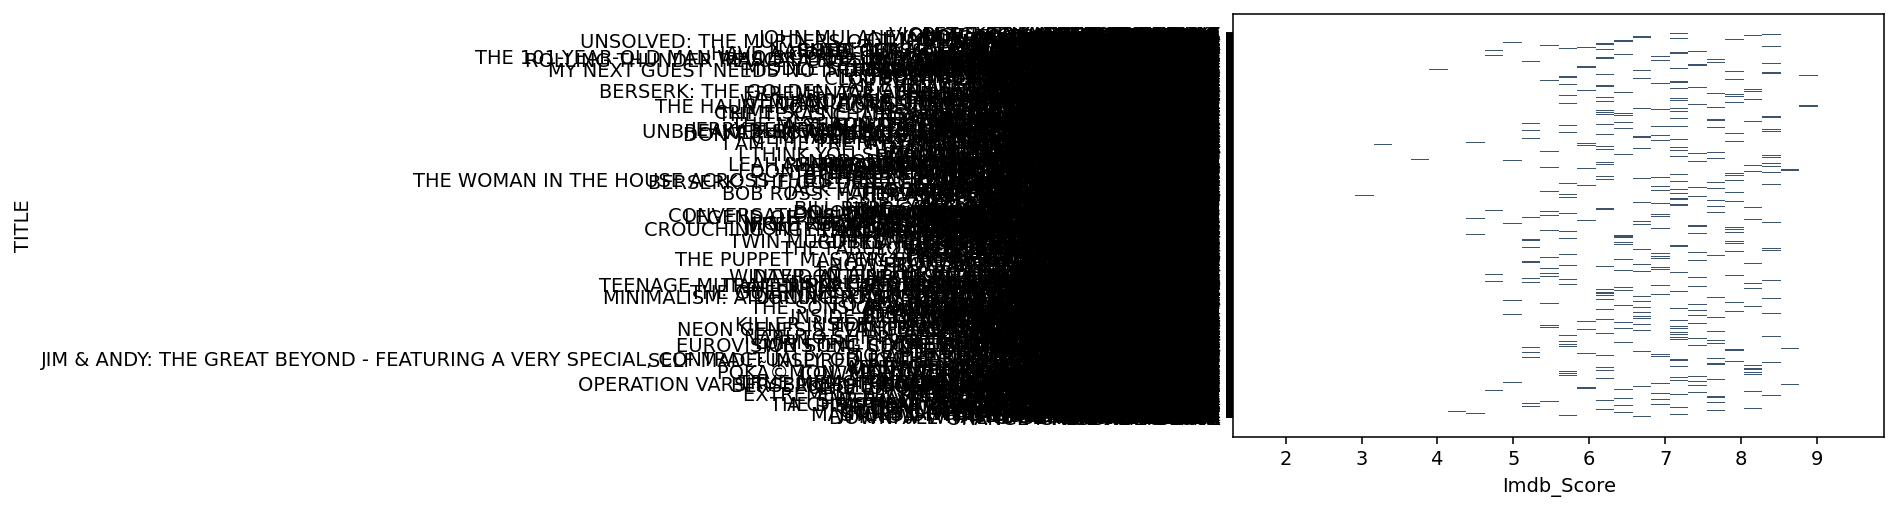

In [20]:
sns.histplot(x="Imdb_Score", y="TITLE", data=nf_df)